# Sustainability Week 2: Embodied impacts

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">How to use this notebook</p>
    <div style="padding: 0 0 2px 10px;">

Simply read the text and **follow the instructions**.  
This notebook contains **code cells**, which can be modified and must be **executed** to see the result of their content.  
To execute a cell, select it and click on the play button (▶) in the tool  bar, or type `Shift + Enter` or `Ctr + Enter`.  

As the variables contained in a cell are stored in memory, the **order of execution** of the cells is important !  
</div>
</div>

Notebook by Maxime Lelièvre, Athina Papageorgiou Koufidou, Yann Bouquet and the Responsible software TAs team (2024).<br/>
Except where otherwise noted, the content of this notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution International License</a> (CC BY 4.0 International).<br/>
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0;margin-top:10px;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>


# Introduction

Following up on the exercise of last week where we measured the carbon footprint of algorithms and Machine Learning models, we now broaden our view of the environmental impacts coming from software. More specifically, since software cannot run without hardware, this notebook explores the environmental impacts coming from hardware using a holistic perspective, covering all stages of a product's life cycle—from development to end-of-life.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Learning Goals</p>
    <div style="padding: 0 0 2px 10px;">
    
**What will be covered :**
- **Part 1 :** Discover a dataset providing the environmental impacts of some IT devices
- **Part 2 :** Analyze the sources of the impact
- **Part 3 :** Compute the impacts of devices with any configuration

**By the end of the session you will be able to:**
- ✅  Explain the concepts of Life Cycle Assessment (LCA) and Product Carbon Footprint (PCF)
- ✅  Identify the source of the environmental impacts in IT devices
- ✅  Implement mathematical models for the environmental impacts of electronic components
</div></div>
<br/>

---

# Hardware Life Cycle Assessment (LCA)

The environmental impacts of software are much broader than what we have explored so far and a big part of it comes from indirect emissions, such as the manufacturing of the **hardware** necessary to run it. To better understand these impacts, we need to take into account the whole life cycle of hardware as a product. 
One approach to doing this is to conduct a Life Cycle Analysis (LCA).

![lifecycle.png](res/lifecycle.png)

An LCA is a holistic method to evaluate the environmental impact of a product or service throughout its entire life cycle, from raw material extraction to end-of-life. It is a systematic way to quantify the environmental impact of a product or service, and to identify opportunities for improvement. A LCA is a multi-impact assessment, i.e. it takes into account various kinds of environmental impacts beyond greenhouse gas emissions such as mineral extraction, water use or land use. There is a standard for LCAs (ISO-14040), which aims to harmonize the way these studies are conducted, allowing us to draw more reliable conlusions and make better comparisons between products.

How can we calculate these impacts? It is a complex process and in this notebook we will focus on a simplified way to make this analysis, by using existing databases and some mathematical models. 



# Part 1: The Boavizta dataset

Boavizta, a working group that specializes in environmental impact assessments of IT products, has released [several tools and datasets](https://boavizta.org/tools), which cover several phases of the lifecycle and [different types of environmental impacts](https://doc.api.boavizta.org/Explanations/impacts/) of IT products from Dell, HP, and Lenovo.

They provide information on the following types of environmental impacts in particular:
- Global warming potential (GWP) is a measure of the total amount of greenhouse gases emitted over the life cycle of a product, expressed in terms of CO2 equivalents (CO2eq).
- Abiotic depletion potential (ADP) is a measure of the depletion of non-renewable resources, such as soil, water, air and minerals. It is expressed in terms of kg antimony eq.
- Primary energy (PE) is a measure of the total amount of energy (renewable and non-renewable) consumed over the life cycle of a product, expressed in terms of mega joules (MJ).

In this part of the notebook we will focus on the Global Warming Potential. The part of the LCA that assesses the climate impact of a product through the measurement of the greenhouse gases (GHGs) emitted throughout its life cycle is called a **Product Carbon Footprint (PCF)**. 

Manufacturers conduct PCF studies of their products and publish datasheets with the results (you can find some examples [here](https://www.dell.com/en-us/dt/corporate/social-impact/advancing-sustainability/climate-action/product-carbon-footprints.htm#tab0=0&#pcfs) and [here](https://www.lenovo.com/fr/fr/compliance/eco-declaration/#servers)).
Boavizta has constructed their dataset using the data provided in such documents.

## 1.1 Explore the dataset

See the table below for a description of the dataset, which you will use in the next parts of this exercise. It has been adapted from the original dataset to make it easier to work with (the original dataset is available [here](https://github.com/Boavizta/environmental-footprint-data)).

| Column                    | Description                                                                                  |
| ------------------------- | -------------------------------------------------------------------------------------------- |
| manufacturer              | Manufacturer name  (e.g. "Dell", "HP")                                                       |
| name                      | Product name                                                                                 |
| category                  | Category of the product (Workplace, Datacenter, Home)                                        |
| subcategory               | Subcategory of the product (Laptop, Tablet, Multimedia, gaming, Server, Converged Edge, ...) |
| gwp_total                 | GHG emissions (in kgCO2eq) through the total lifecycle of the product                        |
| gwp_use_ratio             | part of the GHG emissions coming from the use phase                                          |
| yearly_tec                | Yearly estimated energy demand in kWh                                                        |
| lifetime                  | Expected lifetime (in years)                                                                 |
| use_location              | The region of the world in which the device usage footprint has been estimated.              |
| report_date               | the date at which the Product Carbon Footprint report of the device was published            |
| gwp_error_ratio           | error margin for the footprint                                                               |
| gwp_manufacturing_ratio   | part of the GHG emissions coming from the manufacturing phase                                |
| weight                    | product weight in kg                                                                         |
| assembly_location         | The region of the world in which the device is assembled                                     |
| screen_size               | in inches                                                                                    |
| server_type               | the type of server                                                                           |
| hard_drive                | the hard drive of the device if any                                                          |
| memory                    | RAM in GB                                                                                    |
| number_cpu                | number of CPUs                                                                               |
| height                    | the height of the device in a datacenter rack, in U                                          |
| gwp_transport_ratio       | part of the GHG emissions coming from the transport                                          |
| gwp_eol_ratio             | part of the GHG emissions coming from the end of life of the product                         |
| gwp_electronics_ratio     | part of the GHG emissions coming from the electronics                                        |
| gwp_battery_ratio         | part of the GHG emissions coming from the battery                                            |
| gwp_hdd_ratio             | part of the GHG emissions coming from the HDD                                                |
| gwp_ssd_ratio             | part of the GHG emissions coming from the SSD                                                |
| gwp_othercomponents_ratio | part of the GHG emissions coming from other components                                       |

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Load the data from `res/boavizta-data-us.csv` and display the first few rows.

</div></div>

In [1]:
import pandas as pd
import otter
from res.utils import *
test = otter.Notebook()

# Load the data
boavizta_data = pd.read_csv("./res/boavizta-data-us.csv")

# Display the first few rows
boavizta_data.head() # SOLUTION

manufacturer                                               name   category  \
0        Apple          13-inch MacBook Air (M1 CPU) 256GB - 2020  Workplace   
1        Apple          13-inch MacBook Air (M1 CPU) 512GB - 2020  Workplace   
2        Apple  13-inch MacBook Air with Retina display (1.1GH...  Workplace   
3        Apple  13-inch MacBook Air with Retina display (1.1GH...  Workplace   
4        Apple  13-inch MacBook Pro (1.4GHz quad-core CPU) 256...  Workplace   

  subcategory  gwp_total  gwp_use_ratio  yearly_tec  lifetime use_location  \
0      Laptop      161.0           0.15         NaN       3.0           WW   
1      Laptop      181.0           0.15         NaN       3.0           WW   
2      Laptop      174.0           0.15         NaN       3.0           WW   
3      Laptop      202.0           0.15         NaN       3.0           WW   
4      Laptop      217.0           0.17         NaN       3.0           WW   

   gwp_error_ratio  ...  memory  number_cpu height  gwp_transport_ratio  \
0              0.0  ...     NaN         NaN    NaN                 0.08   
1              0.0  ...     NaN         NaN    NaN                 0.08   
2              0.0  ...     NaN         NaN    NaN                 0.07   
3              0.0  ...     NaN         NaN    NaN                 0.07   
4              0.0  ...     NaN         NaN    NaN                 0.06   

  gwp_eol_ratio gwp_electronics_ratio  gwp_battery_ratio  gwp_hdd_ratio  \
0           NaN                   NaN                NaN            NaN   
1           NaN                   NaN                NaN            NaN   
2           NaN                   NaN                NaN            NaN   
3           NaN                   NaN                NaN            NaN   
4           NaN                   NaN                NaN            NaN   

   gwp_ssd_ratio  gwp_othercomponents_ratio  
0            NaN                        NaN  
1            NaN                        NaN  
2            NaN                        NaN  
3            NaN                        NaN  
4            NaN                        NaN  

[5 rows x 26 columns]

Let's start by exploring how the different stages of a product's life cycle contribute to its environmental impact. The dataset includes columns for the manufacturing, use, transport, and end-of-life phases of the product (`gwp_manufacturing_ratio`, `gwp_use_ratio`, `gwp_transport_ratio`, and `gwp_eol_ratio`, respectively).

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Make a pie chart of the machine named "ProLiant DL345 Gen10 Plus server4" to see the breakdown of its carbon footprint:
* create a dataframe containing only the row with the corresponding name
* keep only the columns "gwp_manufacturing_ratio", "gwp_transport_ratio", "gwp_use_ratio", "gwp_eol_ratio"

</div></div>

gwp_manufacturing_ratio  gwp_transport_ratio  gwp_use_ratio  \
762                    0.299                0.004          0.694   

     gwp_eol_ratio  
762          0.002

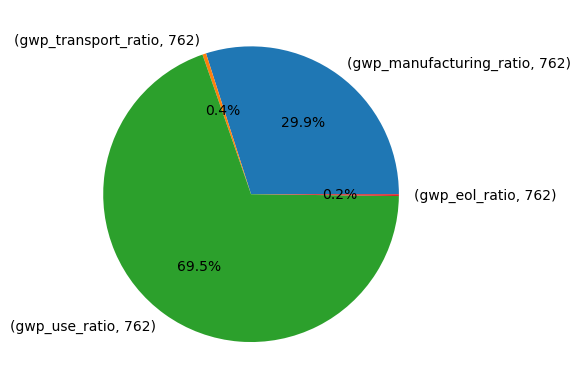

In [2]:
""" # BEGIN PROMPT
# Create a new DataFrame, only containing the row where "name" is "ProLiant DL345 Gen10 Plus server4"
emissions_breakdown = boavizta_data[boavizta_data["..."] == ...]

# Keep only the columns "gwp_manufacturing_ratio", "gwp_transport_ratio", "gwp_use_ratio", "gwp_eol_ratio"
emissions_breakdown = ...

# Display the dataframe
display(emissions_breakdown)

# Create a pie chart for the new DataFrame
emissions_breakdown.unstack().plot(kind="pie", autopct='%1.1f%%');
"""  # END PROMPT

# BEGIN SOLUTION NO PROMPT
# Create a new DataFrame, only containing the row where "name" is "ProLiant DL345 Gen10 Plus server4"
emissions_breakdown = boavizta_data[boavizta_data["name"] == "ProLiant DL345 Gen10 Plus server4"] # SOLUTION

# Keep only the columns "gwp_manufacturing_ratio", "gwp_transport_ratio", "gwp_use_ratio", "gwp_eol_ratio"
emissions_breakdown = emissions_breakdown[["gwp_manufacturing_ratio", "gwp_transport_ratio", "gwp_use_ratio", "gwp_eol_ratio"]]

# Display the dataframe
display(emissions_breakdown)

# Create a pie chart for the new DataFrame
emissions_breakdown.unstack().plot(kind="pie", autopct='%1.1f%%');
# END SOLUTION

In [3]:
test.check("boavizta_global_analysis_q1")

Tests results: All test cases passed!

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

What do you observe from the pie chart? Which phase of the product's life cycle contributes the most to its carbon footprint?
        
</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
From the pie chart, we can see that the use phase is the largest driver of carbon emissions of this particular product, while the manufacturing phase is also significant. The transport and end-of-life phases contribute much less to the overall carbon footprint.
        
</div></div>

## 1.2 Impacts from different lifecycle phases

Do the results from the machine above generalize to the other machines in the dataset? Let's find out by calculating the mean values of the ratios of the different phases of the lifecycle of the products and plotting the results.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Find the mean values of the manufacturing, use, transport, and end-of-life (eol) ratios for all products in the dataset. Then, plot a pie chart to visualize the results.

</div></div>

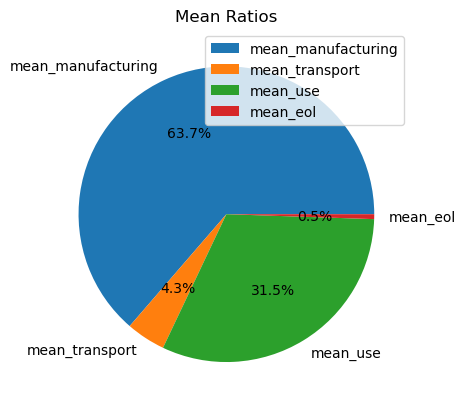

In [4]:
# Retrieve the data
mean_manufacturing = boavizta_data["gwp_manufacturing_ratio"].mean() # SOLUTION
mean_transport = boavizta_data["gwp_transport_ratio"].mean() # SOLUTION
mean_use = boavizta_data["gwp_use_ratio"].mean() # SOLUTION
mean_eol = boavizta_data["gwp_eol_ratio"].mean() # SOLUTION

# Create a Pandas series with the data
mean_ratios = pd.Series({
        "mean_manufacturing": mean_manufacturing,
        "mean_transport": mean_transport, 
        "mean_use": mean_use,
        "mean_eol": mean_eol,
    })

# Plot the mean values as a pie chart
mean_ratios.plot(
    kind="pie",
    autopct="%1.1f%%", 
    legend=True,
    title="Mean Ratios"
);

In [5]:
test.check("boavizta_global_analysis_q2") 

Tests results: All test cases passed!

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

What do you observe from the pie chart? Is it different from the previous results?
        
</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
When we look at the average values for all products in the dataset, we see that the manufacture phase is the largest contributor to the carbon footprint, followed by the use phase, while the contributions of the transport and end-of-life phases are negligible. This is in contrast to the results for the individual machine we looked at earlier, where the use phase was the largest contributor.
        
</div></div>

## 1.3 The manufacturing phase
The manufacturing phase for hardware includes the extraction of raw materials, the production of components, the assembly of the product, and the packaging. 

As a first step, let's investigate, for a given machine, how many kgCO2eq are emitted during the manufacturing phase.

This information is not directly available in the dataset (which only includes the *percentage* of the total carbon footprint attributed to manufacturing), but we can calculate it using the following formula:

$$
gwp_{manufacturing}(kgCO_2eq) = gwp_{total} \times gwp_{manufacturing\_ratio}
$$

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Define the function `add_gwp_manufacturing` that takes a dataframe as a parameter and adds a new column to the dataframe, called `gwp_manufacturing`. This column contains the kgCO2eq emitted during the manufacturing phase of the server following the above formula.

</div></div>

In [6]:
def add_gwp_manufacturing(dataframe):
    dataframe["gwp_manufacturing"] = dataframe["gwp_manufacturing_ratio"] * dataframe["gwp_total"] # SOLUTION

In [7]:
test.check("boavizta_global_analysis_q3")

Tests results: All test cases passed!

In [8]:
# let's apply the function
add_gwp_manufacturing(boavizta_data)

# and look at the result
boavizta_data[['manufacturer', 'name', 'gwp_total', 'gwp_manufacturing_ratio', 'gwp_manufacturing']].head()

manufacturer                                               name  gwp_total  \
0        Apple          13-inch MacBook Air (M1 CPU) 256GB - 2020      161.0   
1        Apple          13-inch MacBook Air (M1 CPU) 512GB - 2020      181.0   
2        Apple  13-inch MacBook Air with Retina display (1.1GH...      174.0   
3        Apple  13-inch MacBook Air with Retina display (1.1GH...      202.0   
4        Apple  13-inch MacBook Pro (1.4GHz quad-core CPU) 256...      217.0   

   gwp_manufacturing_ratio  gwp_manufacturing  
0                     0.76             122.36  
1                     0.76             137.56  
2                     0.77             133.98  
3                     0.77             155.54  
4                     0.76             164.92

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

How many null values are there in the `gwp_manufacturing` column? What do you think could be the reason?

Hint: the Pandas [`info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) and/or [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isnull.html) methods can be useful here.

</div></div>

In [9]:
n_null_values = boavizta_data["gwp_manufacturing"].isnull().sum() # SOLUTION
print(f"Number of null values: {n_null_values}", f"({n_null_values / len(boavizta_data)*100:.2f}%)")

Number of null values: 469 (38.25%)


As we can see, around 40% of the values are missing, because the manufacturers did not provide this information for all products. 

Let's look at an example of a row with a null value for `gwp_manufacturing`:

In [10]:
boavizta_data.loc[boavizta_data.index[92], ['manufacturer', 'name', 'gwp_total', 'gwp_use_ratio', 'gwp_manufacturing_ratio', 'gwp_manufacturing']]

manufacturer                        Asus
name                       Notebook C423
gwp_total                          113.0
gwp_use_ratio                      0.322
gwp_manufacturing_ratio              NaN
gwp_manufacturing                    NaN
Name: 92, dtype: object

Could we perhaps estimate the missing values? 

From the previous analysis we can ignore the transport and eol phases, as their contributions to the overall carbon footprint can be considered negligible. 

Thus, one way to approximate the missing values, is to leverage the use ratio, when available, as the complementary of the manufacturing GWP to the total GWP, whenever the manufacturing ratio is missing:

$$
gwp_{manufacturing} = gwp_{total} \times (1 - gwp_{use\_ratio})
$$

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Define a function that replaces the null values in the column `gwp_manufacturing` using the formula above.

Hint: the Pandas method [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html) can be useful here.

</div></div>

In [11]:
def replace_missing_gwp_manufacturing(dataframe):
    dataframe["gwp_manufacturing"] = dataframe["gwp_manufacturing"].fillna((1 - dataframe["gwp_use_ratio"]) * dataframe["gwp_total"]) # SOLUTION

In [12]:
test.check("boavizta_global_analysis_q4")

Tests results: All test cases passed!

In [13]:
# let's apply the function
replace_missing_gwp_manufacturing(boavizta_data)

# and look at our example from before
boavizta_data.loc[boavizta_data.index[92], ['manufacturer', 'name', 'gwp_total', 'gwp_use_ratio', 'gwp_manufacturing_ratio', 'gwp_manufacturing']]

manufacturer                        Asus
name                       Notebook C423
gwp_total                          113.0
gwp_use_ratio                      0.322
gwp_manufacturing_ratio              NaN
gwp_manufacturing                 76.614
Name: 92, dtype: object

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

What percentage of null values are there in the `gwp_manufacturing` column now? Round the result to two decimal places.

</div></div>

In [14]:
perc_null_values = round(boavizta_data["gwp_manufacturing"].isnull().sum() / len(boavizta_data), 2) # SOLUTION
print(f"Percentage of null values: {perc_null_values*100}%")

Percentage of null values: 6.0%


Now that we have more information, let's explore the main drivers of manufacture phase carbon emissions.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Plot the average emissions of the manufacturing phase for each use category (Workplace, Datacenter, Home) in a bar chart.

1. Create a new DataFrame, containing only the columns `category` and `gwp_manufacturing` from `boavizta_data`.
2. Group the data by `category` and calculate the mean of `gwp_manufacturing`. Hint: you can use the Pandas method [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).
3. Plot the results in a bar chart.

</div></div>

gwp_manufacturing
category                     
Datacenter        1473.150515
Home                36.192241
Workplace          266.694314

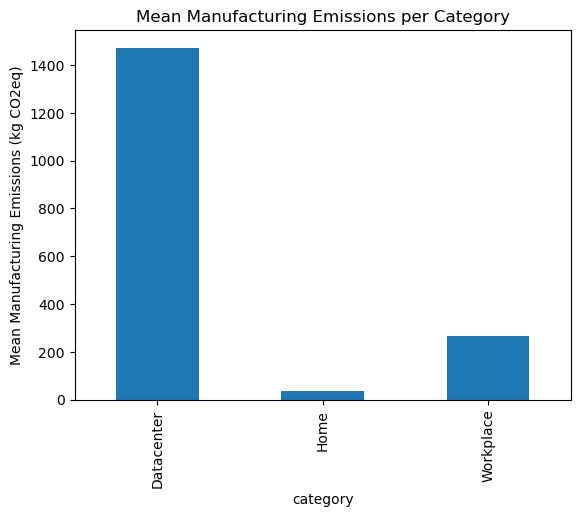

In [15]:
# create the new dataset with only columns "category", "gwp_manufacturing", grouped by category and compute the mean
emissions_per_category_grouped = boavizta_data[["category", "gwp_manufacturing"]].groupby("category").mean() # SOLUTION

# display the resulting dataframe
display(emissions_per_category_grouped)

# plot the bar chart
emissions_per_category_grouped.plot(
    kind="bar", 
    legend=False, 
    title="Mean Manufacturing Emissions per Category", 
    ylabel="Mean Manufacturing Emissions (kg CO2eq)"
);

In [16]:
test.check("boavizta_global_analysis_q5")

Tests results: All test cases passed!

## 1.4 Datacenters

From the plot above, it seems machines used in datacentres are the main drivers of carbon emissions during the manufacture phase, with a mean of approximately 1400 kg of CO2 eq. per machine.

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

Do you think that the above analysis is adequate in terms of estimating the environmental impact of server manufacture? If yes, why? If no, why not?

Some questions to help your reflection:
- Do these data accurately represent current realities/practices? (feel free to do some quick and dirty statistics on the various machine configurations, e.g. check out the average RAM per CPU core).
- What kind of metrics do we use to estimate environmental impact?
        
</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

While interesting as a first attempt, our approach above has several shortcomings.

- Intuitively, the configurations of the machines presented do not seem representative of those actually running in data centers. For example the amount of memory per CPU core appears to be low, as does the average hard drive capacity. While we cannot draw any firm conclusions from these observations, it is easy to suspect that our analysis is actually underestimating the environmental impact of server manufacture (if the machines actually used in datacenters incur higher energy costs than the ones studied to create the dataset).
- The analysis only focuses on carbon emissions, while other kinds of environmental impact are not taken into account (e.g. water usage, mineral resources, etc.)
        
</div></div>

Now assuming the mean carbon emissions we obtained above are correct, what does it mean at the scale of a datacentre?   
For example according to some [estimates](https://www.ibm.com/topics/hyperscale-data-center#:~:text=Average%20data%20center%3A%20The%20average,Energy%20draw%3A%20Around%20100MW), an average full-scale data center can have around 5 000 servers.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Find the mean carbon emissions caused by the manufacture of a machine in the category `Datacenter` and subcategory `Server`. Then, using this value, find the carbon emissions caused by manufacturing enough servers to run a datacentre of [5,000 machines](https://www.ibm.com/topics/hyperscale-data-center#:~:text=Average%20data%20center%3A%20The%20average,Energy%20draw%3A%20Around%20100MW).

</div></div>

In [17]:
mean_server_emissions = boavizta_data[(boavizta_data["category"] == "Datacenter") & (boavizta_data["subcategory"] == "Server")]["gwp_manufacturing"].mean() # SOLUTION
print("According to the Boavizta dataset, the manufacture of a server emits on average", round(mean_server_emissions), "kg of CO2 eq.")

mean_datacenter_emissions = mean_server_emissions * 5000 # SOLUTION
print("As a result, manufacturing enough servers to run a 5 000 machine datacenter emits", round(mean_datacenter_emissions), "kg of CO2 eq.")

According to the Boavizta dataset, the manufacture of a server emits on average 1703 kg of CO2 eq.
As a result, manufacturing enough servers to run a 5 000 machine datacenter emits 8515223 kg of CO2 eq.


In [18]:
test.check("boavizta_global_analysis")

Tests results: All test cases passed!

Let's get some more concrete representations of this carbon footprint:

In [19]:
translate_emissions(mean_server_emissions)
translate_emissions(mean_datacenter_emissions)

1 703 kg of CO₂eq are equivalent to:
🚙 driving an average passenger car for 10 391 km 
🛫 taking an international flight for 9 160 km or
🚂 travelling by train for 381 849 km.

8 515 223 kg of CO₂eq are equivalent to:
🚙 driving an average passenger car for 51 953 771 km 
🛫 taking an international flight for 45 800 468 km or
🚂 travelling by train for 1 909 242 845 km.



We see that the global warming impact of server manufacturing for a datacenter is very large, although we have used mean carbon emissions that are probably underestimated.  

In the following we are going to further explore the footprint of servers: from which components does the impact come from?

# Part 2: Server configurations and components

We analysed the boavizta dataset in a general manner to draw some conclusions on different categories of electronic devices. We decide now to delve deeper in the dataset to better understand which elements in a server cause the largest impact.

## 2.1 The R740 Server - Boavizta version

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Display the data available in the Boavizta dataset for the machine named "PowerEdge R740".

</div></div>

In [20]:
""" # BEGIN PROMPT
boavizta_data_server = boavizta_data[...].iloc[0]
display(boavizta_data_server)
"""  # END PROMPT
# BEGIN SOLUTION NO PROMPT
boavizta_data_server = boavizta_data[boavizta_data["name"] == "PowerEdge R740"].iloc[0]
display(boavizta_data_server)
# END SOLUTION

manufacturer                                                 Dell
name                                               PowerEdge R740
category                                               Datacenter
subcategory                                                Server
gwp_total                                                  8640.0
gwp_use_ratio                                               0.843
yearly_tec                                                 1760.3
lifetime                                                      4.0
use_location                                                   EU
gwp_error_ratio                                            0.9815
gwp_manufacturing_ratio                                     0.152
weight                                                       26.3
assembly_location                                              EU
screen_size                                                   NaN
server_type                                                  Rack
hard_drive

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

What is the total amount of emissions for the manufacturing of the "PowerEdge R740" server?

</div></div>

In [21]:
boavizta_data_server_manufacturing = boavizta_data_server["gwp_manufacturing"] # SOLUTION
print("According to Boavizta, the total emissions of the R740 server manufacturing are", boavizta_data_server_manufacturing, "kg of CO2 eq.")

According to Boavizta, the total emissions of the R740 server manufacturing are 1313.28 kg of CO2 eq.


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

List the server components as registered in the Boavizta database.

Hint: all data are in the Serie `boavizta_data_server`
</div></div>

In [22]:
number_cpu = boavizta_data_server["number_cpu"] # SOLUTION
memory = boavizta_data_server["memory"] # SOLUTION
hard_drive = boavizta_data_server["hard_drive"] # SOLUTION

print(
    f"The PCF data concerns a machine with:\n"
    f"\t - {int(number_cpu):d} CPUs\n"
    f"\t - {int(memory):d} GB of RAM\n"
    f"\t - {(hard_drive):s}"
)

The PCF data concerns a machine with:
	 - 2 CPUs
	 - 32 GB of RAM
	 - x2 300GB 2.5in HDD  x1 1TB 2.5in HDD


In [23]:
test.check("dell_pcf_analysis_q1")

dell_pcf_analysis_q1 results: All test cases passed!

## 2.2 The R740 Server - Dell version

Dell provided a PCF report on the [R740 server](https://corporate.delltechnologies.com/content/dam/digitalassets/active/en/unauth/data-sheets/products/servers/lca_poweredge_r740.pdf) but with another configuration called "high end" i.e., more powerful:
- 2 CPUs
- 384 GB of RAM (12x32GB)
- x8 3.84TB Solid State Drives (SSDs) + x1 400GB SSD
- other components (fans, chassis, PSU, etc.)

To analyse the extent to which the configuration influences the GWP of the manufacturing of a particular device, we are going to further analyze the data provided by Dell.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

We have included the data from the Dell analysis in the file `r740_pcf.csv`. Run the cell below to load.

</div></div>

In [24]:
pcf_dell = pd.read_csv("./res/r740_pcf.csv")
pcf_dell.head()

Parts  \
0                        8*3.84TB Solid State Drives   
1                               12*32GB DIMMs Memory   
2                                      Mainboard PWB   
3                          1*400GB Solid State Drive   
4  Riser card 1 - Riser card 2 - Riser card 4 - E...   

   Emissions (kg of CO2 eq.)  Mass (kg)  
0                       3379      1.068  
1                        533      0.974  
2                        109      1.365  
3                         64      0.132  
4                         59      1.460

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Show the total emissions (kg of C02 eq.) of the r740 server from the PCF sheet provided by DELL.

</div></div>

In [25]:
total_gwp_r740_dell = pcf_dell["Emissions (kg of CO2 eq.)"].sum() # SOLUTION
print("According to the PCF analysis, the total emissions of the R740 server manufacture are ", total_gwp_r740_dell , "kg of CO2 eq.")

According to the PCF analysis, the total emissions of the R740 server manufacture are  4268 kg of CO2 eq.


In [26]:
test.check("dell_pcf_analysis_q2")

dell_pcf_analysis_q2 results: All test cases passed!

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

Compare the two results: on one hand the PCF data provided by Boavizta and on the other hand the PCF data provided by Dell.  
What do you observe and what explains the difference according to you?


</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

We observe that the GWP of the new configuration of r740 server far exceeds our previous results obtained from the boavizta dataset. Clearly the configuration of the server has a big impact on the resulting footprint.  
In particular we can observe that:
- the SSDs seem to have a very large impact
- there is also more impact from the RAM (although it is more limited relatively to the SSDs)

</div></div>

## 2.3 Impact of the mass

Since there are more components in the new configuration of the server, we can see that the mass increases a lot. Is it related to the increase in GWP? Let's analyse the relation between the mass of the components and their GWP.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
 
Sort the `pcf_dell` dataframe by decreasing component mass. Look at the function [`sort_values`](https://pandas.pydata.org/docsreference/api/pandas.DataFrame.sort_values.html).
</div></div>

In [27]:
pcf_dell = pcf_dell.sort_values('Mass (kg)', ascending=False) # SOLUTION

In [28]:
test.check("dell_pcf_analysis_q3")

dell_pcf_analysis_q3 results: All test cases passed!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the following code to plot the graph.
</div></div>

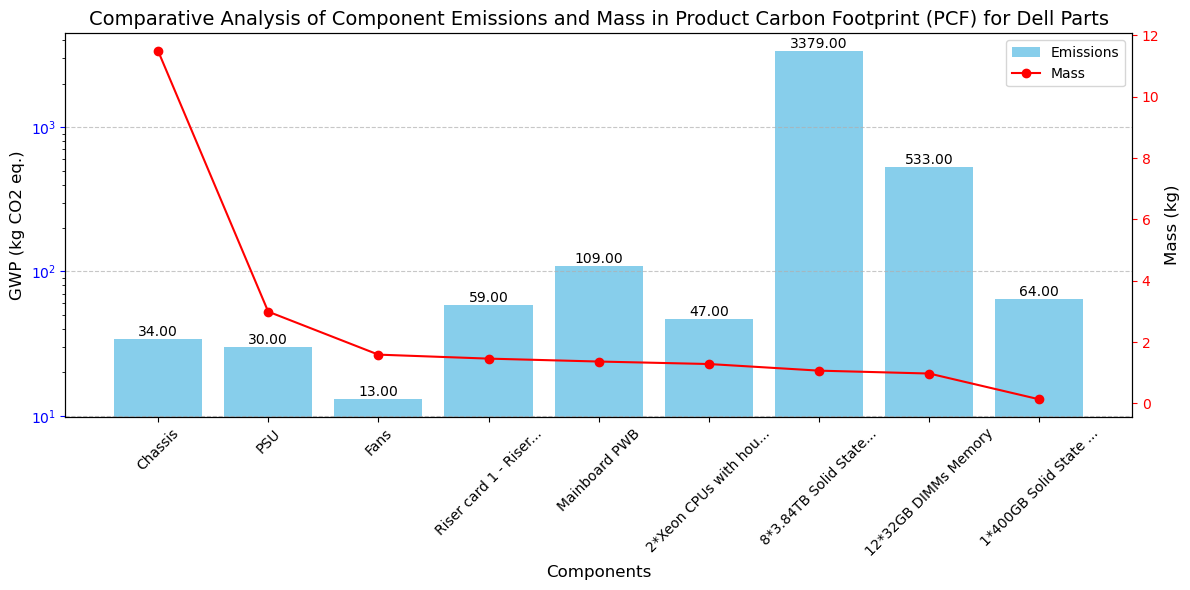

In [29]:
plot_PCF_mass_Dell(pcf_dell)

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

What can you say about the graph? How is the mass related to GWP of a component? What does the GWP seem to be related to? 
</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
- Electronic components have environmental impacts that are disproportionately high compared to their mass, indicating that their impact is driven by manufacturing complexity rather than material quantity.
- This trend is particularly pronounced in memory components (RAM, storage drives), with SSDs showing the highest impact-to-mass ratios.
- In contrast, mechanical components like chassis and fans show environmental impacts more closely aligned with their mass, as they don't involve complex electronic manufacturing processes.
- This pattern is typical in electronic products, where the sophisticated manufacturing processes for electronic components (involving cleanrooms, precision equipment, and chemical processing) generate substantially higher environmental impacts than traditional manufacturing processes used for mechanical parts and packaging.

</div></div>

So far we have analyzed specific devices, in particular the R740 server, based on data provided by Boavizta and the manufacturer.   
But how could we compute the environmental impact of any type of device given its configuration? And how could we obtain other types of impacts than just the Global Warming Potential?

# Part 3: A bottom up approach

In this part, we are going to try out a bottom up approach to evaluating the environmental impact of a device by summing the impact of its components (processor, memory, storage, etc.).

So first we need to have a general way of modeling the environmental impact of a component.

## 3.1 Mathematical modeling of the environmental impacts of components

In her 2012 study ["Life-Cycle Assessment of Semiconductors"](https://link.springer.com/book/10.1007/978-1-4419-9988-7), Sarah Boyd made one of the first attempts to conduct an in-depth LCA on semiconductor devices, including DRAM, flash memory, and CMOS logic.   
Building on her work, various [studies](https://www.researchgate.net/profile/Mathilde_Billaud/publication/373993818_ICs_as_drivers_of_ICT_carbon_footprint_an_approach_to_more_accurate_die_size_assessment/links/65081f9bca19e8355ca04aee/ICs-as-drivers-of-ICT-carbon-footprint-an-approach-to-more-accurate-die-size-assessment.pdf) have found that the main driver of the environmental impact of electronic devices is the **die area of semiconductor chips**, i.e. the surface area of the chip that contains circuits.

The study ["Green Cloud Computing"](https://www.umweltbundesamt.de/sites/default/files/medien/5750/publikationen/2021-06-17_texte_94-2021_green-cloud-computing.pdf), published by the German Federal Environment Agency in 2021, presents the relation between the die area of different chips and their environmental impact, based on the same three key indicators as Boavizta: global warming potential, abiotic depletion potential, and primary energy.

For recall:
- Global warming potential (GWP) is a measure of the total amount of greenhouse gases emitted over the life cycle of a product, expressed in terms of CO2 equivalent (CO2eq).
- Abiotic depletion potential (ADP) is a measure of the depletion of non-renewable resources, such as soil, water, air and minerals. It is expressed in terms of kg antimony equivalent.
- Primary energy (PE) is a measure of the total amount of energy (renewable and non-renewable) consumed over the life cycle of a product, expressed in terms of mega joules (MJ).


The results of the study are presented in the `green_cloud_computing.csv` file. Here is a description of the columns:

| name | description |
|------|-------------|
| Component | The name of the component. "Die" indicates the chip area, while "Base" refers to the all other elements of the component in question. |
| Unit | The unit of the values in the row. |
| ADP (kg Sb eq) | The abiotic depletion potential of the component, measured in kg antimony equivalents. |
| GWP (kg CO2 eq) | The global warming potential of the component, measured in kg CO2 equivalents. |
| PE (MJ) | The primary energy of the component, measured in mega joules. |

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the cell below to load and display the data from the file `green_cloud_computing.csv`.

</div></div>

In [30]:
impact_data = pd.read_csv("./res/green_cloud_computing.csv").set_index("Component")
impact_data

Unit           ADP     GWP       PE
Component                                             
CPU Base           Unit  2.040000e-02    9.14    156.0
CPU Die             cm2  5.800000e-07    1.97     26.5
RAM Base           Unit  1.690000e-03    5.22     74.0
RAM Die             cm2  6.300000e-05    2.20     27.3
SSD Base           Unit  5.630000e-04    6.34     76.9
SSD Die             cm2  6.300000e-05    2.20     27.3
HDD                Unit  2.500000e-04   31.10    276.0
Motherboard        Unit  3.690000e-03   66.10    836.0
Rack Server        Unit  2.020000e-02  150.00   2200.0
Blade Enclosure    Unit  4.320000e-01  880.00  12700.0
Blade Server       Unit  6.720000e-04   30.90    435.0
Server Assembly    Unit  1.410000e-06    6.68     68.6
Power Supply Unit    kg  8.300000e-03   24.30    352.0

We need to come up with formulas to calculate the impact of each component based on the above information. Luckily, the study done by Boavizta proposes some formulas for the main components that we suggests to implement in order to do our own LCA.

To do so, we provide helper methods to calculate the impact of a particular component that we invite you to use in your further implementation.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the cell below to import the helper functions.

</div></div>

In [31]:
# Import the helper functions from the impact_helpers.py file by running this cell
from res.impact_helpers import *

<div style="border-left: 6px solid rgba(128, 0, 128, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(128, 0, 128, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Decorators</p>
<div style="padding: 0 0 2px 10px;">

First, we give two decorators that help in rounding the impact values (`round_impact`) and validating the indicator (`validate_indicator`).

Decorators in Python are functions that modify other functions. They're used with the `@decorator_name` syntax above function definitions. In this notebook, decorators are used to:
- Round impact calculation results (`@round_impact`)
- Validate input indicators (`@validate_indicator`)

These decorators improve code reusability, maintainability, and consistency across multiple impact calculation functions without altering their core logic.

Run the cell below to see the documentation of the decorators.
</div></div>


In [32]:
get_3_1_guidelines_decorator()

<table style="width:100%; border-collapse: separate; border-spacing: 10px;"><tr><td style="width:49.5%; vertical-align: top; background-color: #f5f5f5; border-radius: 8px; padding: 15px;"><pre style='color: #424242; font-size: 12px; white-space: pre-wrap; margin: 0; padding: 0;'><h5 style='text-decoration: underline; margin-bottom: 5px; margin-top: 0;'><b style='font-weight:bold;'>round_impact</b>(func)</h5>
    A decorator that rounds the result of the wrapped function to two decimal places for the 'PE' and 'GWP' indicators, and to five decimal places for the 'ADP' indicator.
    <div style='background-color: #e8f5e9; padding: 5px; border-radius: 6px; margin: 2px 0;'><b style='color: #2e7d32;'>Args:</b>
        <span style='color: #43a047; font-weight: bold;'>func</span><span style='color: #f57f17;'> (function):</span> The function to be wrapped. The wrapped function should return a numerical value. The wrapped function should also have an 'indicator' argument, ideally as the second argument.
    </div><div style='background-color: #e3f2fd; padding: 5px; border-radius: 6px; margin: 2px 0;'><b style='color: #1565c0;'>Returns:</b>
        <span style='color: #2979ff; font-weight: bold;'>function</span><span style='color: #2979ff; font-weight: bold;'>:</span> The wrapper function that rounds the output.</div></pre></td><td style="width:49.5%; vertical-align: top; background-color: #f5f5f5; border-radius: 8px; padding: 15px;"><pre style='color: #424242; font-size: 12px; white-space: pre-wrap; margin: 0; padding: 0;'><h5 style='text-decoration: underline; margin-bottom: 5px; margin-top: 0;'><b style='font-weight:bold;'>validate_indicator</b>(func)</h5>
    A decorator that check if the 'indicator' argument passed to the wrapped function is valid. To be valid, the indicator must be one of the following: "GWP", "PE", or "ADP". If the indicator is invalid, it raises a ValueError.
    <div style='background-color: #e8f5e9; padding: 5px; border-radius: 6px; margin: 2px 0;'><b style='color: #2e7d32;'>Args:</b>
        <span style='color: #43a047; font-weight: bold;'>func</span><span style='color: #f57f17;'> (function):</span> The function to be wrapped. The wrapped function must have an 'indicator' argument, ideally as the second argument.
    </div><div style='background-color: #e3f2fd; padding: 5px; border-radius: 6px; margin: 2px 0;'><b style='color: #1565c0;'>Returns:</b>
        <span style='color: #2979ff; font-weight: bold;'>function</span><span style='color: #2979ff; font-weight: bold;'>:</span> The wrapper function with added validation for the 'indicator' argument.
    </div><div style='background-color: #ffcccb; padding: 5px; border-radius: 6px; margin: 2px 0;'><b style='color: #9a0e01;'>Raises:</b>
        <span style='color: #e7472c; font-weight: bold;'>ValueError</span><span style='color: #e7472c; font-weight: bold;'>:</span> If 'indicator' is not one of the valid options ("GWP", "PE", or "ADP").</div></pre></td></tr></table>

<div style="border-left: 6px solid rgba(128, 0, 128, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(128, 0, 128, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Helper functions</p>
<div style="padding: 0 0 2px 10px;">

Next, we have two helper functions to retrieve two types of environmental impact for a component: 
- the 'Base' impact (a constant baseline impact).
- the 'Die' impact (from the silicon chip manufacturing) 

Run the cell below to see the documentation of the two functions.
</div></div>


In [33]:
get_3_1_guidelines_impact()

<table style="width:100%; border-collapse: separate; border-spacing: 10px;"><tr><td style="width:49.5%; vertical-align: top; background-color: #f5f5f5; border-radius: 8px; padding: 15px;"><pre style='color: #424242; font-size: 12px; white-space: pre-wrap; margin: 0; padding: 0;'><h5 style='text-decoration: underline; margin-bottom: 5px; margin-top: 0;'><b style='font-weight:bold;'>base_impact</b>(impact_data, component, indicator)</h5>
    Retrieves the environmental impact of the 'Base' part of a specified component.
    <div style='background-color: #e8f5e9; padding: 5px; border-radius: 6px; margin: 2px 0;'><b style='color: #2e7d32;'>Args:</b>
        <span style='color: #43a047; font-weight: bold;'>impact_data</span><span style='color: #f57f17;'> (pd.DataFrame):</span> The DataFrame containing impact data.
        <span style='color: #43a047; font-weight: bold;'>component</span><span style='color: #f57f17;'> (str):</span> The name of the component (e.g., "CPU").
        <span style='color: #43a047; font-weight: bold;'>indicator</span><span style='color: #f57f17;'> (str):</span> The environmental indicator to use (e.g., "GWP", "PE", "ADP").
    </div><div style='background-color: #e3f2fd; padding: 5px; border-radius: 6px; margin: 2px 0;'><b style='color: #1565c0;'>Returns:</b>
        <span style='color: #2979ff; font-weight: bold;'>float</span><span style='color: #2979ff; font-weight: bold;'>:</span> The impact value for the 'Base' part of the component.</div></pre></td><td style="width:49.5%; vertical-align: top; background-color: #f5f5f5; border-radius: 8px; padding: 15px;"><pre style='color: #424242; font-size: 12px; white-space: pre-wrap; margin: 0; padding: 0;'><h5 style='text-decoration: underline; margin-bottom: 5px; margin-top: 0;'><b style='font-weight:bold;'>die_impact</b>(impact_data, component, indicator)</h5>
    Retrieves the environmental impact of the 'Die' part of a specified component.
    <div style='background-color: #e8f5e9; padding: 5px; border-radius: 6px; margin: 2px 0;'><b style='color: #2e7d32;'>Args:</b>
        <span style='color: #43a047; font-weight: bold;'>impact_data</span><span style='color: #f57f17;'> (pd.DataFrame):</span> The DataFrame containing impact data.
        <span style='color: #43a047; font-weight: bold;'>component</span><span style='color: #f57f17;'> (str):</span> The name of the component (e.g., "CPU").
        <span style='color: #43a047; font-weight: bold;'>indicator</span><span style='color: #f57f17;'> (str):</span> The environmental indicator to use (e.g., "GWP", "PE", "ADP").
    </div><div style='background-color: #e3f2fd; padding: 5px; border-radius: 6px; margin: 2px 0;'><b style='color: #1565c0;'>Returns:</b>
        <span style='color: #2979ff; font-weight: bold;'>float</span><span style='color: #2979ff; font-weight: bold;'>:</span> The impact value for the 'Die' part of the component.</div></pre></td></tr></table>

We want to use them to implement different formulas that will calculate the impact of certain components. As examples, we provide three different impact calculators in the following cells.

- `PSU_Impact` to calculate the impact of a machine's power supply, given the number of units and the weight per unit (in kg). Use the following formula and round the result to two decimal points.

$$
\text{PSU impact}_{indicator} = \text{psu units} \times \text{weight per unit} \times \text{unit}_{indicator}
$$

In [34]:
@round_impact
@validate_indicator
def calculate_psu_impact(impact_data, indicator, psu_units, psu_weight):
    """
    Calculates the environmental impact of the Power Supply Unit (PSU).

    Args:
        impact_data (pd.DataFrame): The DataFrame containing impact data.
        indicator (str): The environmental indicator to use (e.g., "GWP", "PE", "ADP").
        psu_units (int): The number of PSU units.
        psu_weight (float): The weight of each PSU unit.

    Returns:
        float: The total environmental impact of the PSU, rounded.
    """
    return psu_units * psu_weight * impact_data.loc["Power Supply Unit", indicator]

- `CASE_Impact` as the impact the server case. Boavizta provides a formula to calculate it, depending on its type (rack or blade). If the case is a rack, the impact can be found directly in the `impact_data` DataFrame. If it is a blade, the impact is estimated as 

$$
\text{blade server impact}_{indicator} + \frac{\text{blade enclosure impact}_{indicator}}{16}
$$

In [35]:
@round_impact
@validate_indicator
def calculate_case_impact(impact_data, indicator, case_type):
    """
    Calculates the environmental impact of the server case.

    Args:
        impact_data (pd.DataFrame): The DataFrame containing impact data.
        indicator (str): The environmental indicator to use (e.g., "GWP", "PE", "ADP").
        case_type (str): The type of server case ("Rack" or "Blade").

    Raises:
        ValueError: If the case type is invalid.

    Returns:
        float: The environmental impact of the case, rounded.
    """
    if case_type == "Rack":
        case_impact = impact_data.at["Rack Server", indicator]
    elif case_type == "Blade":
        blade_server_impact = impact_data.at["Blade Server", indicator]
        blade_enclosure_impact = impact_data.at["Blade Enclosure", indicator]
        case_impact = blade_server_impact + blade_enclosure_impact / 16
    else:
        raise ValueError(f"Case type {case_type} not valid.")
    
    return case_impact

- `HDD_Impact` is much simpler to calculate.

$$
\text{HDD impact}_{indicator} = \text{hdd units} \times \text{unit}_{indicator}
$$

In [36]:
@round_impact
@validate_indicator
def calculate_hdd_impact(impact_data, indicator, hdd_units):
    """
    Calculates the environmental impact of Hard Disk Drives (HDDs).

    Args:
        impact_data (pd.DataFrame): The DataFrame containing impact data.
        indicator (str): The environmental indicator to use (e.g., "GWP", "PE", "ADP").
        hdd_units (int): The number of HDD units.

    Returns:
        float: The total environmental impact of the HDDs, rounded.
    """
    return hdd_units * impact_data.loc["HDD", indicator]

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the implementation below to calculate the environmental impact of a CPU. Use the following formula and round the result to two decimal points.

$$
\text{CPU impact}_{indicator} = \text{cpu units} \times \left( \left( \text{cpu cores} \times \text{cpu die size} + 0.491 \right ) \times \text{die impact}_{indicator} + \text{base impact}_{indicator} \right)
$$

In the above formula, `indicator` can be `ADP`, `GWP`, or `PE`.

You can use the `die_impact` and `base_impact` helper methods explained earlier in your implementation to fetch '$\text{die impact}_{indicator}$' and '$\text{base impact}_{indicator}$' respectively.  
Example: `die_impact(impact_data, "CPU", indicator)`

</div></div>

In [37]:
@round_impact
@validate_indicator
def calculate_cpu_impact(impact_data, indicator, cpu_units, cpu_cores, cpu_die_size=0.245):
    return cpu_units * ((cpu_cores * cpu_die_size + 0.491) * die_impact(impact_data, "CPU", indicator) +  base_impact(impact_data, "CPU", indicator)) # SOLUTION

Check your method here:

In [38]:
test.check("impact_cpu")

Impact CPU Formula Test results: All test cases passed!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the method below to calculate the environmental impact of RAM, using the following formula and round the result to two decimal points.


$$
\text{RAM impact}_{indicator} = \text{ram units} \times \left( \left( \frac{\text{ram size}}{\text{ram density}} \right) \times \text{die impact}_{indicator} + \text{base impact}_{indicator} \right)
$$

</div></div>

In [39]:
@round_impact
@validate_indicator
def calculate_ram_impact(impact_data, indicator, ram_units, ram_size, ram_density=1.79):
    return ram_units * ((ram_size / ram_density) *  die_impact(impact_data, "RAM", indicator) + base_impact(impact_data, "RAM", indicator)) # SOLUTION

Check your method here:

In [40]:
test.check("impact_ram")

Impact RAM Formula Test results: All test cases passed!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the implementation below to calculate the environmental impact of SSDs, using the following formula and round the result to two decimal points.


$$
\text{SSD impact}_{indicator} = \text{ssd units} \times \left( \left( \frac{\text{ssd size}}{\text{ssd density}} \right) \times \text{die impact}_{indicator} + \text{base impact}_{indicator} \right)
$$

</div></div>

In [41]:
@round_impact
@validate_indicator
def calculate_ssd_impact(impact_data, indicator, ssd_units, ssd_size, ssd_density=50.6):
    return ssd_units * ((ssd_size / ssd_density) * die_impact(impact_data, "SSD", indicator) + base_impact(impact_data, "SSD", indicator)) # SOLUTION

Check your method here:

In [42]:
test.check("impact_ssd")

Impact SSD Formula Test results: All test cases passed!

## 3.2 Impact of a machine for a given configuration

Now, it's time to bring everything together and create a function that will give us the environmental impacts of a machine for a given configuration.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Create a function that will take the configuration of a machine and the environmental indicator (ADP, GWP, or PE) as input, and return the total impact of the machine with respect to that indicator.

The formula is:

$$
\begin{aligned}
\text{total impact}_{indicator} = \text{CPU impact}_{indicator} + \text{RAM impact}_{indicator}\\ + \text{SSD impact}_{indicator} + \text{HDD impact}_{indicator}\\ + \text{motherboard impact}_{indicator} + \text{PSU impact}_{indicator}\\ + \text{case impact}_{indicator} + \text{assembly impact}_{indicator}
\end{aligned}$$

We did not create functions to calculate the motherboard and assembly impacts, but they can be found in the `impact_data` DataFrame and used directly.

Round the result to two decimal places.
</div></div>

In [43]:
''' # BEGIN PROMPT
@round_impact
@validate_indicator
def calculate_total_impact(impact_data, indicator="GWP",
                      cpu_units=0, cpu_cores=0, ram_units=0, ram_size=0, 
                      ssd_units=0, ssd_size=0, hdd_units=0, 
                      psu_units=0, psu_weight=0.0, case_type="Rack"):
    """
    Calculates the overall impact of a server based on the given parameters.
    
    Parameters:
    - impact_data (pd.DataFrame): DataFrame containing impact data for all components.
    - indicator (str): Environmental indicator to be used (e.g., "GWP", "PE", "ADP").
    - cpu_units (int): The number of CPU units.
    - cpu_cores (int): The number of CPU co
    - ram_units (int): The number of RAM units.
    - ram_size (int): The size of the RAM in GB.
    - ssd_units (int): The number of SSD units.
    - ssd_size (int): The size of the SSD in GB.
    - hdd_units (int): The number of HDD units.
    - psu_units (int): The number of PSU units.
    - psu_weight (float): The weight of a single PSU unit in kg.
    - case_type (str): The type of the case ("Rack" or "Blade").
    
    Returns:
    - float: The overall server impact.
    """
        
    # Initialize total impact
    total_impact = 0
    ...
    return total_impact
''' # END PROMPT

# BEGIN SOLUTION NO PROMPT
@round_impact
@validate_indicator
def calculate_total_impact(impact_data, indicator="GWP",
                      cpu_units=0, cpu_cores=0, ram_units=0, ram_size=0, 
                      ssd_units=0, ssd_size=0, hdd_units=0, 
                      psu_units=0, psu_weight=0.0, case_type="Rack"):
    """
    Calculates the overall impact of a server based on the given parameters.
    
    Parameters:
    - impact_data (pd.DataFrame): DataFrame containing impact data for all components.
    - indicator (str): Environmental indicator to be used (e.g., "GWP", "PE", "ADP").
    - cpu_units (int): The number of CPU units.
    - cpu_cores (int): The number of CPU co
    - ram_units (int): The number of RAM units.
    - ram_size (int): The size of the RAM in GB.
    - ssd_units (int): The number of SSD units.
    - ssd_size (int): The size of the SSD in GB.
    - hdd_units (int): The number of HDD units.
    - psu_units (int): The number of PSU units.
    - psu_weight (float): The weight of a single PSU unit in kg.
    - case_type (str): The type of the case ("Rack" or "Blade").
    
    Returns:
    - float: The overall server impact.
    """    
    # Initialize total impact
    total_impact = 0

    params = impact_data, indicator
    # Calculate impact for each component
    total_impact += calculate_cpu_impact(*params, cpu_units, cpu_cores)
    total_impact += calculate_ram_impact(*params, ram_units, ram_size)
    total_impact += calculate_ssd_impact(*params, ssd_units, ssd_size)
    total_impact += calculate_hdd_impact(*params, hdd_units)
    total_impact += calculate_psu_impact(*params, psu_units, psu_weight)
    total_impact += calculate_case_impact(*params, case_type)
    
    # Add impact for motherboard and server assembly (constant impacts)
    total_impact += impact_data.loc["Motherboard", indicator]
    total_impact += impact_data.loc["Server Assembly", indicator]
    
    return total_impact
    
# END SOLUTION

Check your method here:

In [44]:
test.check("total_impact")

Total Impact results: All test cases passed!

## 3.3 Comparison at the level of the machine

Now, that we have everything in place, let's try out our new approach! We will estimate the carbon emissions of the Dell PowerEdge R740 server and compare them with the PCF conducted by Dell.

The configuration of the [machine](https://www.delltechnologies.com/asset/en-us/products/servers/technical-support/Full_LCA_Dell_R740.pdf) is the following:
- 2 CPUs of 24 cores each
- 12 x 32GB RAM modules
- 1 x 400GB SSD (for this calculation, we will not consider the 3.84TB SSDs)
- no HDD
- 2 PSU units of 1.5 kg each
- 1 rack-type case

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Calculate the global warming potential (GWP) of the manufacture of a Dell PowerEdge R740 server with the above configuration using the function you created.

</div></div>

In [45]:
total_gwp_r740 = calculate_total_impact(impact_data, "GWP", 2, 24, 12, 32, 1, 400, 0, 2, 1.5, "Rack") # SOLUTION

print("According to our calculations, the total GWP impact of manufacturing a Dell PowerEdge R740 server is", total_gwp_r740, "kg of CO2 eq.")

According to our calculations, the total GWP impact of manufacturing a Dell PowerEdge R740 server is 897.39 kg of CO2 eq.


In [46]:
test.check("test_total_gwp_r740")

Total GWP (R740) results: All test cases passed!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Now, let's compare the results of our analysis with the PCF conducted by Dell. Sum the emissions of the components in the `pcf_dell` DataFrame that we have used in part 2.2 to get the total GWP of the machine as provided by Dell.

</div></div>

In [47]:
# First, remove the 8 * 3.84 TB SSDs from the DataFrame, since we are not including them in the comparison
pcf_dell = pcf_dell.drop(pcf_dell[pcf_dell["Parts"] == "8*3.84TB Solid State Drives"].index)

# Sum the emissions of all parts
total_gwp_r740_dell = pcf_dell["Emissions (kg of CO2 eq.)"].sum() # SOLUTION

print("According to Dell's LCA analysis, the total GWP impact of manufacturing a Dell PowerEdge R740 server is", total_gwp_r740_dell, "kg of CO2 eq.")

According to Dell's LCA analysis, the total GWP impact of manufacturing a Dell PowerEdge R740 server is 889 kg of CO2 eq.


In [48]:
test.check("test_total_gwp_r740_dell")

Total GWP (R740) - Dell results: All test cases passed!

We can see that the results are quite close (~1.5% difference). This is a good sign that our approach is on the right track! However, we also need to check that the GWP is distributed in a similar way between the components.  

As this notebook is quite long, the comparison at the level of the components is optional.  
If you skip it, make sure to [go to the conclusion](#Conclusion-and-final-reflection) for a final reflection!

## 3.4 [Optional] Comparison at the level of the components

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

We have combined the GWP results of the two analyses in the file `r740_gwp_comparison.csv`. Execute the cell below to load and display the data.

</div></div>

In [49]:
r740_gwp_comparison = pd.read_csv("./res/r740_gwp_comparison.csv").set_index("Component")
r740_gwp_comparison

Dell LCA - GWP (kg CO2eq.)  Our analysis - GWP (kg CO2eq.)
Component                                                            
CPU                                47                           43.38
RAM                               533                          534.60
SSD                                64                           23.73
OTHER                             265                          295.68

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Add a new columns to the `r740_gwp_comparison` DataFrame, called `Difference (%)`, that contains the percentage difference between the GWP of each component in the two analyses.

The formula is:

$$
\text{Difference (\%)} = \frac{\text{GWP}_{\text{Dell}} - \text{GWP}_{\text{our analysis}}}{\text{GWP}_{\text{Dell}}} \times 100
$$

Round the result to two decimal places.
</div></div>

In [50]:
r740_gwp_comparison["Difference (%)"] = round(((r740_gwp_comparison["Dell LCA - GWP (kg CO2eq.)"] - r740_gwp_comparison["Our analysis - GWP (kg CO2eq.)"]) / r740_gwp_comparison["Dell LCA - GWP (kg CO2eq.)"]) * 100, 2) # SOLUTION
r740_gwp_comparison

Dell LCA - GWP (kg CO2eq.)  Our analysis - GWP (kg CO2eq.)  \
Component                                                               
CPU                                47                           43.38   
RAM                               533                          534.60   
SSD                                64                           23.73   
OTHER                             265                          295.68   

           Difference (%)  
Component                  
CPU                  7.70  
RAM                 -0.30  
SSD                 62.92  
OTHER              -11.58

In [51]:
test.check("difference_gwp_q1")

Difference GWP Test (1) results: All test cases passed!

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

What do you observe? How close are the results of the two analyses? Are there any components that stand out in terms of the difference in GWP?
        
</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

The estimated GWP values are quite close for most of the components, with the exception of the SSDs. This discrepancy could mean that perhaps the formula we used to estimate the impact of SSDs is not accurate enough and will need to be revised in a future iteration.
        
</div></div>

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Now, create two new columns in the `r740_gwp_comparison` DataFrame, called `Dell LCA - GWP %` and `Our analysis - GWP %`, that contain the percentage of the total GWP of the machine that each component is responsible for (e.g the total GWP in the Dell LCA is 909 kg CO2 eq., of which the CPU is responsible for 47, so the `Dell LCA - GWP %` for the CPU would be (47/909) * 100 = 5.17%).

Round the results to two decimal places.

</div></div>

In [52]:
r740_gwp_comparison["Dell LCA - GWP %"] = round((r740_gwp_comparison["Dell LCA - GWP (kg CO2eq.)"] / total_gwp_r740_dell) * 100, 2) # SOLUTION
r740_gwp_comparison["Our analysis - GWP %"] = round((r740_gwp_comparison["Our analysis - GWP (kg CO2eq.)"] / total_gwp_r740) * 100, 2) # SOLUTION
r740_gwp_comparison

Dell LCA - GWP (kg CO2eq.)  Our analysis - GWP (kg CO2eq.)  \
Component                                                               
CPU                                47                           43.38   
RAM                               533                          534.60   
SSD                                64                           23.73   
OTHER                             265                          295.68   

           Difference (%)  Dell LCA - GWP %  Our analysis - GWP %  
Component                                                          
CPU                  7.70              5.29                  4.83  
RAM                 -0.30             59.96                 59.57  
SSD                 62.92              7.20                  2.64  
OTHER              -11.58             29.81                 32.95

In [53]:
test.check("difference_gwp_q2")

Difference GWP Test (2) results: All test cases passed!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Plot the new columns as pie charts.

</div></div>

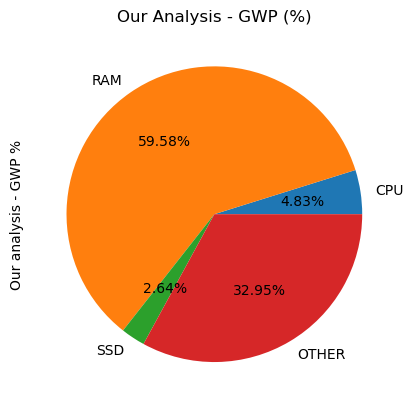

In [54]:
""" # BEGIN PROMPT
r740_gwp_comparison["Our analysis - GWP %"].plot(
    kind=...
    autopct=%1.2f%%',
    title=...
);
""" # END PROMPT

# BEGIN SOLUTION NO PROMPT
r740_gwp_comparison["Our analysis - GWP %"].plot(kind="pie", autopct='%1.2f%%', title="Our Analysis - GWP (%)");
# END SOLUTION

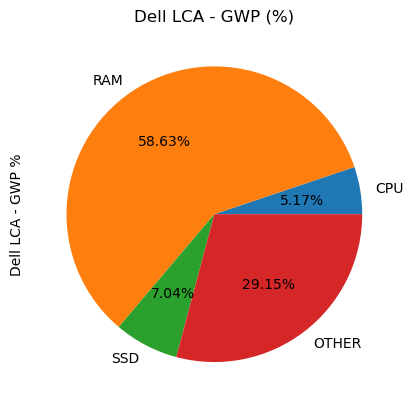

In [55]:
""" # BEGIN PROMPT
r740_gwp_comparison["Dell LCA - GWP %"].plot(
    kind=...
    autopct=%1.2f%%',
    title=...
);
""" # END PROMPT
# BEGIN SOLUTION NO PROMPT
r740_gwp_comparison["Dell LCA - GWP %"].plot(kind="pie", autopct='%1.2f%%', title="Dell LCA - GWP (%)");
# END SOLUTION

We can see that the distribution of the GWP is quite similar between the two analyses, which provides further evidence that our approach is valid.

Finally, let's examine the other indicators and compare the impact distribution across components.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Execute the cell below to display a stacked bar chart comparing the distribution of the GWP, ADP, and PE across the components of the Dell PowerEdge R740 server.

To make the comparison easier, we converted the values to percentages of the total impact for each indicator.

</div></div>

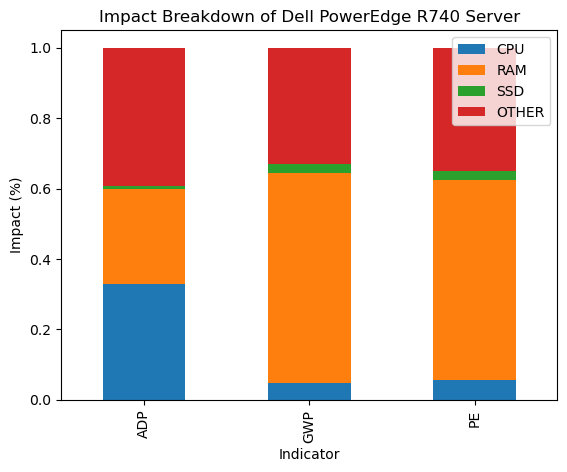

In [56]:
r740_all_impacts = pd.DataFrame(columns=["CPU", "RAM", "SSD", "OTHER"], index=["ADP", "GWP", "PE"])

for indicator in ["ADP", "GWP", "PE"]:
    server_impact = calculate_total_impact(impact_data, indicator, 2, 24, 12, 32, 1, 400, 0, 2, 1.5, "Rack")
    cpu_impact = calculate_cpu_impact(impact_data, indicator, cpu_units = 2, cpu_cores = 24)
    ram_impact = calculate_ram_impact(impact_data, indicator, ram_units = 12, ram_size = 32)
    ssd_impact = calculate_ssd_impact(impact_data, indicator, ssd_units = 1, ssd_size = 400)
    other_impact = server_impact - cpu_impact - ram_impact - ssd_impact
    
    r740_all_impacts.at[indicator, "CPU"] = cpu_impact/server_impact
    r740_all_impacts.at[indicator, "RAM"] = ram_impact/server_impact
    r740_all_impacts.at[indicator, "SSD"] = ssd_impact/server_impact
    r740_all_impacts.at[indicator, "OTHER"] = other_impact/server_impact
    
r740_all_impacts.plot(kind="bar", stacked=True, title="Impact Breakdown of Dell PowerEdge R740 Server", ylabel="Impact (%)", xlabel="Indicator");

In [57]:
r740_all_impacts

CPU       RAM       SSD     OTHER
ADP  0.327897  0.271573  0.008517  0.392013
GWP   0.04834  0.595728  0.026443  0.329489
PE   0.054835  0.569279  0.024706  0.351179

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

What do you observe in the above plot? How are the impacts distributed across the components for the different indicators?
        
</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

- Looking closely at the global warming potential and primary energy indicators, it seems that the RAM has the highest impact. 
- However, in the abiotic depletion potential indicator, this trend is not maintained; the RAM, CPU and other components have similar impacts.
- It's important to note here that there is not a perfect correlation between indicators and, as a result, the environmental impact of a product or component can vary significantly depending on the indicator used.
        
</div></div>

# Conclusion and final reflection

In this notebook, we have explored different ways to estimate the environmental impact of a machine, from a top-down approach (using Boavizta data) to a bottom-up approach (using component-level mathematical modeling). We have seen that the latter approach provides a more detailed and accurate picture of the environmental impact of a machine, allowing us to identify the main drivers of this impact and to compare different machines more effectively.

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

In this notebook we have explored the environmental impacts of *hardware*. When we compute the environmental impact of *software* we should take into account the impact coming from the hardware on which it runs. But hardware lasts several years and runs multiple software products, which use resources like the CPU, RAM or data storage differently. So how could we attribute to a piece of software a share of the impact coming from the hardware?
        
</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

Researchers argue that we should attribute to software a portion of the environmental impact of hardware using two scaling ratios:
- a time use ratio: it takes into account the execution time of the concerned software over the total lifetime of the hardware
- a resource use ratio: it takes into account the amount of computing resources used (e.g. CPU, RAM) over the total resources of the hardware

We will detail how this is done on an example in one of the videos!

</div></div>